# CZ1115 INTRODUCTION TO DATA SCIENCE AND ARTIFICIAL INTELLIGENCE

## DATASET: ALPHAVANTAGE

## Team 5:
- Sng Yi Xuan U2021009B 
- Timothy Chang U2022114A 
- Ivan Lua U2022506F 


In [ ]:
pip install alpha_vantage pandas

     |████████████████████████████████| 1.3MB 6.8MB/s 
     |████████████████████████████████| 143kB 25.4MB/s 
     |████████████████████████████████| 296kB 19.5MB/s 


In [ ]:
pip install plotly

In [ ]:
# WHERE ALL THE IMPORTS GO

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.cryptocurrencies import CryptoCurrencies
from pprint import pprint

import requests 
import json

sb.set()

# import the time module
import time
  
# define the countdown func.
def countdown(t):
    
    while t:
        mins, secs = divmod(t, 60)
        timer = '{:02d}:{:02d}'.format(mins, secs)
        print(timer, end="\r")
        time.sleep(1)
        t -= 1

# PROBLEM FORMULATION (ALL)

## Given some financial information provided by AlphaVantage, how may we develop a solution to identify strong companies and recommend a diversified portfolio to investors 

# Data Powered By AlphaVantage (Yi Xuan)

### We can obtain a company's key information such as 'Company's Overview", "Balance Sheet", "Income Statement" and "Cash Flow Statement" 

### The company's overview gives us the data of important financial ratios of a company, for example Gross Profit or PERatio. Other ratios not available in the company's overview can be seperately calculated using information provided in the balance sheet, income statement or cash flow statement. For example, Debt-To-Equity Ratio can be calculated by taking Total Liabilities / Total Shareholder's Equity, which of, are data that are available in the balance sheet.  

In [ ]:
# GIVE US THE COMPANY'S FUNDAMENTAL DATA OVERVIEW 
symbol = "GOOGL"
call = requests.get(f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey=JHYG3ZSHVH3089AE').text
call = json.loads(call)
overview = pd.DataFrame.from_dict(call,orient = 'index')
overview

,0
Symbol,GOOGL
AssetType,Common Stock
Name,Alphabet Inc
Description,Alphabet Inc. provides online advertising serv...
CIK,1652044
Exchange,NASDAQ
Currency,USD
Country,USA
Sector,Communication Services
Industry,Internet Content & Information


In [ ]:
# GIVE US THE COMPANY'S EARNINGS 
function = "EARNINGS"
call = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey=JHYG3ZSHVH3089AE').text
call = json.loads(call)
pd.DataFrame(call['quarterlyEarnings'])

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2020-12-31,2021-02-02,22.3,16.0105,6.2895,39.2836
1,2020-09-30,2020-10-29,16.4,11.1964,5.2036,46.4757
2,2020-06-30,2020-07-30,10.13,8.2091,1.9209,23.3996
3,2020-03-31,2020-04-28,9.87,10.762,-0.892,-8.2884
4,2019-12-31,2020-02-03,15.35,12.5938,2.7562,21.8854
...,...,...,...,...,...,...
61,2005-09-30,2005-10-20,0.76,0.68,0.08,11.7647
62,2005-06-30,2005-07-21,0.68,0.61,0.07,11.4754
63,2005-03-31,2005-04-21,0.65,0.46,0.19,41.3043
64,2004-12-31,2005-02-01,0.46,0.39,0.07,17.9487


In [ ]:
# GIVE US THE COMPANY'S BALANCE SHEET 
function = "BALANCE_SHEET"
call = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey=JHYG3ZSHVH3089AE').text
call = json.loads(call)
balance_sheet = pd.DataFrame(call['quarterlyReports'])
balance_sheet

,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,intangibleAssets,intangibleAssetsExcludingGoodwill,goodwill,investments,longTermInvestments,shortTermInvestments,otherCurrentAssets,otherNonCurrrentAssets,totalLiabilities,totalCurrentLiabilities,currentAccountsPayable,deferredRevenue,currentDebt,shortTermDebt,totalNonCurrentLiabilities,capitalLeaseObligations,longTermDebt,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
0,2020-12-31,USD,319616000000,174296000000,26465000000,136694000000,728000000,31384000000,146720000000,84749000000,None,22620000000,1445000000,21175000000,138984000000,22103000000,116087000000,5490000000,3953000000,97072000000,56834000000,5589000000,3024000000,1100000000,None,40238000000,11146000000,15319000000,999000000,14000000000,15319000000,2543000000,2269000000,222544000000,None,163401000000,58510000000,675222000
1,2020-09-30,USD,299243000000,164369000000,20129000000,132596000000,835000000,25513000000,134874000000,93582000000,None,22390000000,1520000000,20870000000,134397000000,15956000000,117501000000,5425000000,3274000000,86323000000,48200000000,4391000000,2756000000,1121000000,None,38123000000,12519000000,14899000000,999000000,13900000000,-173000000,2302000000,2194000000,212920000000,None,155567000000,57307000000,677724000
2,2020-06-30,USD,278492000000,149069000000,17742000000,121080000000,815000000,21595000000,129423000000,90315000000,None,22521000000,1697000000,20824000000,122355000000,14161000000,107832000000,5579000000,2731000000,71170000000,43658000000,4064000000,2458000000,1136000000,None,27512000000,1171000000,5297000000,997000000,2963000000,-37000000,2061000000,1992000000,207322000000,None,151681000000,55937000000,681215000
3,2020-03-31,USD,273403000000,147018000000,19644000000,117229000000,889000000,23735000000,126385000000,87966000000,None,22574000000,1840000000,20734000000,114470000000,13567000000,100399000000,5165000000,2748000000,69744000000,40189000000,4099000000,2288000000,1312000000,None,19079000000,1154000000,5512000000,1312000000,3960000000,-40000000,1938000000,2427000000,203659000000,None,151068000000,53688000000,683972000
4,2019-12-31,USD,275909000000,152578000000,18498000000,119675000000,999000000,27492000000,123331000000,84587000000,None,22603000000,1979000000,20624000000,21315000000,14378000000,104473000000,4412000000,2342000000,74467000000,45221000000,5561000000,4566000000,115000000,None,29246000000,685000000,4685000000,None,3958000000,-42000000,1908000000,2534000000,201442000000,None,152122000000,50552000000,688335000
5,2019-09-30,USD,263044000000,148358000000,16032000000,121177000000,1401000000,21081000000,114686000000,69252000000,None,19816000000,1747000000,18069000000,124290000000,13688000000,110031000000,4699000000,2225000000,3700000000,39224000000,4142000000,2043000000,None,None,19185000000,126000000,3956000000,None,3956000000,-44000000,1679000000,1637000000,194969000000,None,147125000000,49040000000,690906000
6,2019-06-30,USD,257101000000,147437000000,16587000000,121056000000,964000000,21317000000,109664000000,64891000000,None,19902000000,1902000000,18000000000,222621000000,13312000000,111596000000,4100000000,2461000000,3900000000,37000000000,3925000000,2104000000,None,1064000000,18821000000,120000000,3954000000,1064000000,3954000000,-46000000,1717000000,1499000000,192192000000,None,145346000000,47937000000,694050000
7,2019-03-31,USD,245349000000,138207000000,19148000000,113488000000,1053000000,19260000000,107142000000,60528000000,None,20006000000,2063000000,17943000000,204944000000,15774000000,96694000000,4406000000,2547000000,61877000000,34910000000,3710000000,None,None,1142000000,17479000000,114000000,3952000000,114

In [ ]:
# GIVE US THE COMPANY'S INCOME STATEMENT 
function = "INCOME_STATEMENT"
call = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey=JHYG3ZSHVH3089AE').text
call = json.loads(call)
income_statement = pd.DataFrame(call['quarterlyReports'])
income_statement

,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,researchAndDevelopment,operatingExpenses,investmentIncomeNet,netInterestIncome,interestIncome,interestExpense,nonInterestIncome,otherNonOperatingIncome,depreciation,depreciationAndAmortization,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome
0,2020-12-31,USD,30038000000,56118000000,26080000000,26080000000,15651000000,8145000000,7022000000,15167000000,None,-53000000,386000000,53000000,-125497000000,-420000000,None,3725000000,18689000000,3462000000,53000000,15227000000,15814000000,15651000000,19376000000,15227000000
1,2020-09-30,USD,25211000000,46328000000,21117000000,21117000000,11213000000,6987000000,6856000000,13843000000,None,-48000000,460000000,48000000,46376000000,-88000000,None,3478000000,13359000000,2112000000,48000000,11247000000,11589000000,11213000000,14691000000,11247000000
2,2020-06-30,USD,20195000000,38748000000,18553000000,18553000000,6383000000,6486000000,6875000000,13361000000,None,-13000000,433000000,13000000,38761000000,-147000000,None,3386000000,8277000000,1318000000,13000000,6959000000,7760000000,6383000000,9769000000,6959000000
3,2020-03-31,USD,-18852000000,41289000000,18982000000,18982000000,7977000000,7380000000,6820000000,14200000000,None,-21000000,586000000,21000000,41310000000,18000000,None,3108000000,7757000000,921000000,21000000,6836000000,6971000000,7977000000,11085000000,6836000000
4,2019-12-31,USD,24185000000,45205000000,21020000000,21020000000,9266000000,8567000000,7222000000,15789000000,None,-17000000,621000000,17000000,-116329000000,-72000000,None,3413000000,10704000000,33000000,17000000,10671000000,10635000000,9266000000,12679000000,10671000000
5,2019-09-30,USD,23368000000,40936000000,17568000000,17568000000,9177000000,7200000000,6554000000,13754000000,None,-23000000,631000000,23000000,40959000000,68000000,None,2920000000,8628000000,1560000000,23000000,7068000000,6963000000,9177000000,12097000000,7068000000
6,2019-06-30,USD,21857000000,39153000000,17296000000,17296000000,9180000000,6255000000,6213000000,12468000000,None,-25000000,653000000,25000000,39178000000,53000000,None,2835000000,12147000000,2200000000,25000000,9947000000,10636000000,9180000000,12015000000,9947000000
7,2019-03-31,USD,-15796000000,36555000000,16012000000,16012000000,6608000000,5993000000,6029000000,12022000000,None,-35000000,1417000000,35000000,36590000000,53000000,None,2613000000,8146000000,1489000000,35000000,6657000000,7213000000,6608000000,9221000000,6657000000
8,2018-12-31,USD,117808000000,39276000000,17918000000,17918000000,8221000000,7103000000,6034000000,13137000000,None,-29000000,None,29000000,-97749000000,68000000,None,2580000000,10072000000,1124000000,29000000,8948000000,8318000000,8221000000,10801000000,8948000000
9,2018-09-30,USD,-13941000000,33740000000,14281000000,14281000000,8625000000,5602000000,5232000000,10834000000,None,-28000000,None,28000000,34108000000,49000000,None,2355000000,10083000000,891000000,28000000,9192000000,9041000000,8625000000,10980000000,9192000000


In [ ]:
# GIVE US THE COMPANY'S CASH FLOW
function = "CASH_FLOW"
call = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey=JHYG3ZSHVH3089AE').text
call = json.loads(call)
cash_flow = pd.DataFrame(call['quarterlyReports'])
cash_flow

,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,profitLoss,cashflowFromInvestment,cashflowFromFinancing,proceedsFromRepaymentsOfShortTermDebt,paymentsForRepurchaseOfCommonStock,paymentsForRepurchaseOfEquity,paymentsForRepurchaseOfPreferredStock,dividendPayout,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
0,2020-12-31,USD,22677000000,554000000,None,5783000000,6183000000,3725000000,5479000000,5445000000,None,15227000000,-7281000000,-9270000000,None,7904000000,7904000000,None,None,None,None,None,None,None,-7904000000,None,6126000000,None,15227000000
1,2020-09-30,USD,17003000000,527000000,None,3690000000,3834000000,3478000000,5406000000,3601000000,None,11247000000,-15197000000,546000000,None,7897000000,7897000000,None,None,None,None,None,None,None,-7897000000,None,2352000000,None,11247000000
2,2020-06-30,USD,13993000000,493000000,None,1689000000,324000000,3386000000,5391000000,80000000,None,6959000000,-8448000000,-7498000000,None,6852000000,6852000000,None,None,None,None,None,None,None,-6852000000,None,1075000000,None,6959000000
3,2020-03-31,USD,11451000000,430000000,None,-4329000000,-2487000000,3108000000,6005000000,-2602000000,None,6836000000,-1847000000,-8186000000,None,8496000000,8496000000,None,None,None,None,None,None,None,-8496000000,None,1418000000,None,6836000000
4,2019-12-31,USD,14427000000,449000000,None,5243000000,4199000000,3413000000,6052000000,4365000000,None,10671000000,-4703000000,-7326000000,None,6098000000,6098000000,None,None,None,None,None,None,None,-6098000000,None,2398000000,None,10671000000
5,2019-09-30,USD,15466000000,442000000,None,1851000000,612000000,2920000000,6732000000,1000000,None,7068000000,-8945000000,-6954000000,None,5696000000,5696000000,None,None,None,None,None,None,None,-5696000000,None,-433000000,None,7068000000
6,2019-06-30,USD,12627000000,396000000,None,1276000000,1057000000,2835000000,6126000000,1146000000,None,9947000000,-10455000000,-4746000000,None,3577000000,3577000000,None,None,None,None,None,None,None,-3577000000,None,3425000000,None,9947000000
7,2019-03-31,USD,12000000000,374000000,None,-735000000,-907000000,2613000000,4638000000,-1172000000,None,6657000000,-5388000000,-4183000000,None,3025000000,3025000000,None,None,None,None,None,None,None,-3025000000,None,2429000000,18000000,6657000000
8,2018-12-31,USD,12987000000,None,None,3030000000,2854000000,2580000000,7081000000,2887000000,None,8948000000,-6876000000,-2746000000,None,2650000000,2650000000,None,None,None,None,None,None,None,-2650000000,None,3258000000,-107000000,8948000000
9,2018-09-30,USD,13210000000,None,None,2150000000,1154000000,2355000000,5282000000,670000000,None,9192000000,-10408000000,-3478000000,None,2200000000,2200000000,None,None,None,None,None,None,None,-2200000000,None,-705000000,-29000000,9192000000


# LIST OF POTENTIAL COMPANIES 

### This is the list of companies that we aim to analyse and to filter out the best few companies to invest in, based on machine learning techniques and knowledge in financial ratios. 

In [ ]:
ticker_list = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOGL', 'GOOG', 'INTC', 'NVDA', 'ADBE',
               'PYPL', 'CSCO', 'NFLX', 'PEP', 'TSLA', 'CMCSA', 'AMGN', 'COST', 'TMUS', 'AVGO',
               'TXN', 'CHTR', 'QCOM', 'GILD', 'SBUX', 'INTU', 'VRTX', 'MDLZ', 'ISRG', 'FISV',
               'BKNG', 'ADP', 'REGN', 'ATVI', 'AMD', 'JD', 'MU', 'AMAT', 'ILMN', 'ADSK',
               'CSX', 'MELI', 'LRCX', 'ADI', 'ZM', 'BIIB', 'EA', 'KHC', 'WBA', 'LULU',
               'EBAY', 'MNST', 'DXCM', 'EXC', 'BIDU', 'XEL', 'WDAY', 'DOCU', 'SPLK', 'ORLY',
               'NXPI', 'CTSH', 'KLAC', 'SNPS', 'SGEN', 'ASML', 'IDXX', 'CSGP', 'CTAS', 'VRSK',
               'MAR', 'CDNS', 'PAYX', 'ALXN', 'MCHP', 'SIRI', 'ANSS', 'VRSN', 'FAST', 'BMRN',
               'XLNX', 'INCY','DLTR', 'SWKS', 'ALGN', 'CERN', 'CPRT', 'CTXS', 'TTWO', 'MXIM',
               'CDW', 'CHKP', 'WDC', 'ULTA', 'NTAP', 'FOXA', 'LBTYK']

In [ ]:
len(ticker_list)

96

# 4 Preliminary Metrics to Assess a Company's Financial Position (Yi Xuan)

To measure Profitability: 
- Return on Equity (ROE)
- Return on Asset (ROA)
- Profit Margin 
- Operating Margin 

To measure Liquidity & Efficiency:
- Current Ratio 
- Cash Ratio 

To measure Solvency:
- Debt-Equity ratio 
- Debt-Asset Ratio  

To measure Market Prospects:
- P/E Ratio 
- EPS 
- Price to Book Ratio 

Profitability helps provide insight into how much profit a company generates and how that profit relates to other important information about the company. 

Liquidity measures how quickly a company generates cash to buy additional assets or repay its debts quickly.

Solvency ratios are used by investors to get a picture of how well a company can deal with its long-term financial obligations. For example, investors will generally avoid companies with more long term debts.

Market Prospect primarily integrate a company’s publicly traded stock price to give investors an understanding of how inexpensive or expensive the company is in the market.


In [ ]:
# FUNCTION TO APPEND EACH FUNDAMENTAL DATA OF A COMPANY 
x = []
def append_list(ticker_list):
    for ticker in ticker_list:

        # COMPANY OVERVIEW
        cry = requests.get(f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey=2OKTRBI1VS45M21F').text
        cry = json.loads(cry)
        list = []
        try:
            list.append(cry['Symbol'])
            list.append(cry['EPS'])
            list.append(cry['PERatio'])
            list.append(cry['ReturnOnEquityTTM'])
            list.append(cry['ProfitMargin'])
            list.append(cry['OperatingMarginTTM'])
            list.append(cry['ReturnOnAssetsTTM'])
            list.append(cry['PriceToBookRatio'])
            

            # BALANCE SHEET 
            call = requests.get(f'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={ticker}&apikey=JHYG3ZSHVH3089AE').text
            call = json.loads(call)
            balance_sheet = pd.DataFrame(call['annualReports'])

            # Formula to calculate Debt-Equity Ratio 
            balance_sheet['totalLiabilities'] = pd.to_numeric(balance_sheet['totalLiabilities'],errors='coerce')
            balance_sheet['totalShareholderEquity'] = pd.to_numeric(balance_sheet['totalShareholderEquity'],errors='coerce')
            dte = balance_sheet["totalLiabilities"][0] / balance_sheet["totalShareholderEquity"][0]
            list.append(dte)

            # Formula to calculate Debt-Asset Ratio 
            balance_sheet['shortTermDebt'] = pd.to_numeric(balance_sheet['shortTermDebt'],errors='coerce')
            balance_sheet['longTermDebt'] = pd.to_numeric(balance_sheet['longTermDebt'],errors='coerce')
            balance_sheet['totalAssets'] = pd.to_numeric(balance_sheet['totalAssets'],errors='coerce')
            dta = balance_sheet["totalLiabilities"][0] / balance_sheet["totalAssets"][0]
            list.append(dta)

            #Formula to calculate Current Ratio 
            balance_sheet['totalCurrentAssets'] = pd.to_numeric(balance_sheet['totalCurrentAssets'],errors='coerce')
            balance_sheet['totalCurrentLiabilities'] = pd.to_numeric(balance_sheet['totalCurrentLiabilities'],errors='coerce')
            current_ratio = balance_sheet["totalCurrentAssets"][0] / balance_sheet["totalCurrentLiabilities"][0]
            list.append(current_ratio)

            #Formula to calculate Cash Ratio 
            balance_sheet['cashAndCashEquivalentsAtCarryingValue'] = pd.to_numeric(balance_sheet['cashAndCashEquivalentsAtCarryingValue'],errors='coerce')
            cash_ratio = balance_sheet["cashAndCashEquivalentsAtCarryingValue"][0] / balance_sheet["totalCurrentLiabilities"][0]
            list.append(cash_ratio)

        except:
            print("Max of 5 calls per minute!")
            break
        x.append(list)
    countdown(60)

In [ ]:
# ITERATE THROUGH EACH COMPANY OF TICKER LIST AND EXTRACTING THEIR FUNDEMENTAL DATA

#PLS SEE!!!
#Do not run this code as AlphaVantage has a limit of 5 calls per minute thus, it will take approximately 50 mins to run through the entire list 

count = 0 
fake_list = []

for company in ticker_list:
    fake_list.append(company) 
    count += 1
    
    if (count == 2) or (company == "LBTYK"):
        count = 0 
        append_list(fake_list)
        fake_list = []

In [ ]:
x

[['AAPL',
  '3.687',
  '36.5989',
  '0.8209',
  '0.2174',
  '0.2525',
  '0.1336',
  '34.1826',
  3.957039440456695,
  0.7982666847799239,
  1.3636044481554577,
  0.36071049035979963],
 ['MSFT',
  '6.707',
  '38.5776',
  '0.427',
  '0.3347',
  '0.3924',
  '0.1281',
  '15.1',
  1.5469214903976196,
  0.6073691302342098,
  2.5157654542940118,
  0.18774719955746094],
 ['AMZN',
  '41.83',
  '80.6122',
  '0.2744',
  '0.0553',
  '0.0593',
  '0.0524',
  '18.3473',
  2.7968074172412316,
  0.8133158984417566,
  1.0502274795268425,
  0.33328322190133325],
 ['FB',
  '10.09',
  '29.9544',
  '0.2542',
  '0.339',
  '0.3801',
  '0.1395',
  '6.781',
  0.24184270013251227,
  0.19474503502473073,
  5.051064681930446,
  1.1732194112542553],
 ['GOOGL',
  '58.613',
  '39.0657',
  '0.19',
  '0.2206',
  '0.2258',
  '0.0865',
  '6.9362',
  0.436192393414336,
  0.3037144573488186,
  3.0667558151810534,
  0.4656543618256677],
 ['GOOG',
  '58.613',
  '39.3',
  '0.19',
  '0.2206',
  '0.2258',
  '0.0865',
  '6.9745'

# CLUSTERING TABLE CONTAINING ALL FINANCIAL DATA USED (Timothy)

In [ ]:
clustering_table = pd.DataFrame(x, 
                  columns = ['Stocks', 'EPS', 'PE Ratio','Return On Equity','Profit Margin','Operating Margin', 'Return On Assets', 
                             'Price-To-Book Ratio', 'Debt to Equity Ratio', 'Debt to Asset Ratio', 'Current Ratio', 'Cash Ratio'], )

clustering_table = clustering_table[['Stocks','Return On Equity','Return On Assets','Profit Margin','Operating Margin','Current Ratio', 'Cash Ratio',
                                     'Debt to Equity Ratio', 'Debt to Asset Ratio','PE Ratio','EPS','Price-To-Book Ratio']]
                                     
clustering_table

,Stocks,Return On Equity,Return On Assets,Profit Margin,Operating Margin,Current Ratio,Cash Ratio,Debt to Equity Ratio,Debt to Asset Ratio,PE Ratio,EPS,Price-To-Book Ratio
0,AAPL,0.8209,0.1336,0.2174,0.2525,1.363604,0.360710,3.957039,0.798267,36.5989,3.687,34.1826
1,MSFT,0.427,0.1281,0.3347,0.3924,2.515765,0.187747,1.546921,0.607369,38.5776,6.707,15.1
2,AMZN,0.2744,0.0524,0.0553,0.0593,1.050227,0.333283,2.796807,0.813316,80.6122,41.83,18.3473
3,FB,0.2542,0.1395,0.339,0.3801,5.051065,1.173219,0.241843,0.194745,29.9544,10.09,6.781
4,GOOGL,0.19,0.0865,0.2206,0.2258,3.066756,0.465654,0.436192,0.303714,39.0657,58.613,6.9362
...,...,...,...,...,...,...,...,...,...,...,...,...
91,WDC,0.0174,0.0148,0.0102,0.0372,2.053563,0.691784,1.686839,0.627815,123.3032,0.554,2.1454
92,ULTA,0.0901,0.0507,0.0286,0.0656,1.871513,0.778478,NaN,0.607159,105.5498,3.11,9.296
93,NTAP,1.5579,0.0709,0.1059,0.164,1.181969,0.735066,30.082645,0.967828,29.2952,2.639,36.189
94,FOXA,0.1459,0.0817,0.1208,0.223,3.927597,2.437041,1.321775,0.613425,14.911,2.527,2.0526


In [ ]:
# Checking the data types of each financial data variable 
clustering_table.dtypes

Stocks                   object
Return On Equity         object
Return On Assets         object
Profit Margin            object
Operating Margin         object
Current Ratio           float64
Cash Ratio              float64
Debt to Equity Ratio    float64
Debt to Asset Ratio     float64
PE Ratio                 object
EPS                      object
Price-To-Book Ratio      object
dtype: object

In [ ]:
# Changing the data types to numeric 
clustering_table['Return On Equity'] = pd.to_numeric(clustering_table['Return On Equity'],errors='coerce')
clustering_table['Return On Assets'] = pd.to_numeric(clustering_table['Return On Assets'],errors='coerce')
clustering_table['Profit Margin'] = pd.to_numeric(clustering_table['Profit Margin'],errors='coerce')
clustering_table['Operating Margin'] = pd.to_numeric(clustering_table['Operating Margin'],errors='coerce')
clustering_table['PE Ratio'] = pd.to_numeric(clustering_table['PE Ratio'],errors='coerce')
clustering_table['EPS'] = pd.to_numeric(clustering_table['EPS'],errors='coerce')
clustering_table['Price-To-Book Ratio'] = pd.to_numeric(clustering_table['Price-To-Book Ratio'],errors='coerce')
clustering_table.dtypes

Stocks                   object
Return On Equity        float64
Return On Assets        float64
Profit Margin           float64
Operating Margin        float64
Current Ratio           float64
Cash Ratio              float64
Debt to Equity Ratio    float64
Debt to Asset Ratio     float64
PE Ratio                float64
EPS                     float64
Price-To-Book Ratio     float64
dtype: object

# DATA CLEANING (Ivan)
## Removing stocks with NaN values

In dealing with NaN values, we had to choose between removing all rows with NaN values, or imputing data using interpolated values, like Mean. For this study, we chose to adopt the former, where random missing values for a stock would result in removal of the entirety of the row.

e.g. Missing value for CDNS (2017) in 'ReturnOnAssetsTTM', resulted in removal of CDNS as one of the stocks used in clustering analysis.

Rationale: While (B) would achieve a balance between preserving sample size and data integrity, there are only a minute amount of missing values, and removing all rows with NaN values would not severely reduce the sample size, thus (A) would not make these unsupervised learning models significantly less accurate. 


In [ ]:
# Detect NaN values and remove the respective row
clustering_table = clustering_table.dropna()
clustering_table = clustering_table.reset_index(drop=True)
clustering_table

,Stocks,Return On Equity,Return On Assets,Profit Margin,Operating Margin,Current Ratio,Cash Ratio,Debt to Equity Ratio,Debt to Asset Ratio,PE Ratio,EPS,Price-To-Book Ratio
0,AAPL,0.8209,0.1336,0.2174,0.2525,1.363604,0.360710,3.957039,0.798267,36.5989,3.687,34.1826
1,MSFT,0.4270,0.1281,0.3347,0.3924,2.515765,0.187747,1.546921,0.607369,38.5776,6.707,15.1000
2,AMZN,0.2744,0.0524,0.0553,0.0593,1.050227,0.333283,2.796807,0.813316,80.6122,41.830,18.3473
3,FB,0.2542,0.1395,0.3390,0.3801,5.051065,1.173219,0.241843,0.194745,29.9544,10.090,6.7810
4,GOOGL,0.1900,0.0865,0.2206,0.2258,3.066756,0.465654,0.436192,0.303714,39.0657,58.613,6.9362
...,...,...,...,...,...,...,...,...,...,...,...,...
84,CHKP,0.2407,0.0974,0.4100,0.4379,1.475968,0.165630,0.684611,0.406391,19.9966,5.960,4.6381
85,WDC,0.0174,0.0148,0.0102,0.0372,2.053563,0.691784,1.686839,0.627815,123.3032,0.554,2.1454
86,NTAP,1.5579,0.0709,0.1059,0.1640,1.181969,0.735066,30.082645,0.967828,29.2952,2.639,36.1890
87,FOXA,0.1459,0.0817,0.1208,0.2230,3.927597,2.437041,1.321775,0.613425,14.9110,2.527,2.0526


# EXPLORATORY ANALYSIS AND DATA VISUALISATION (Ivan)

## Plotting histogram and violinplot for each fundamental data 



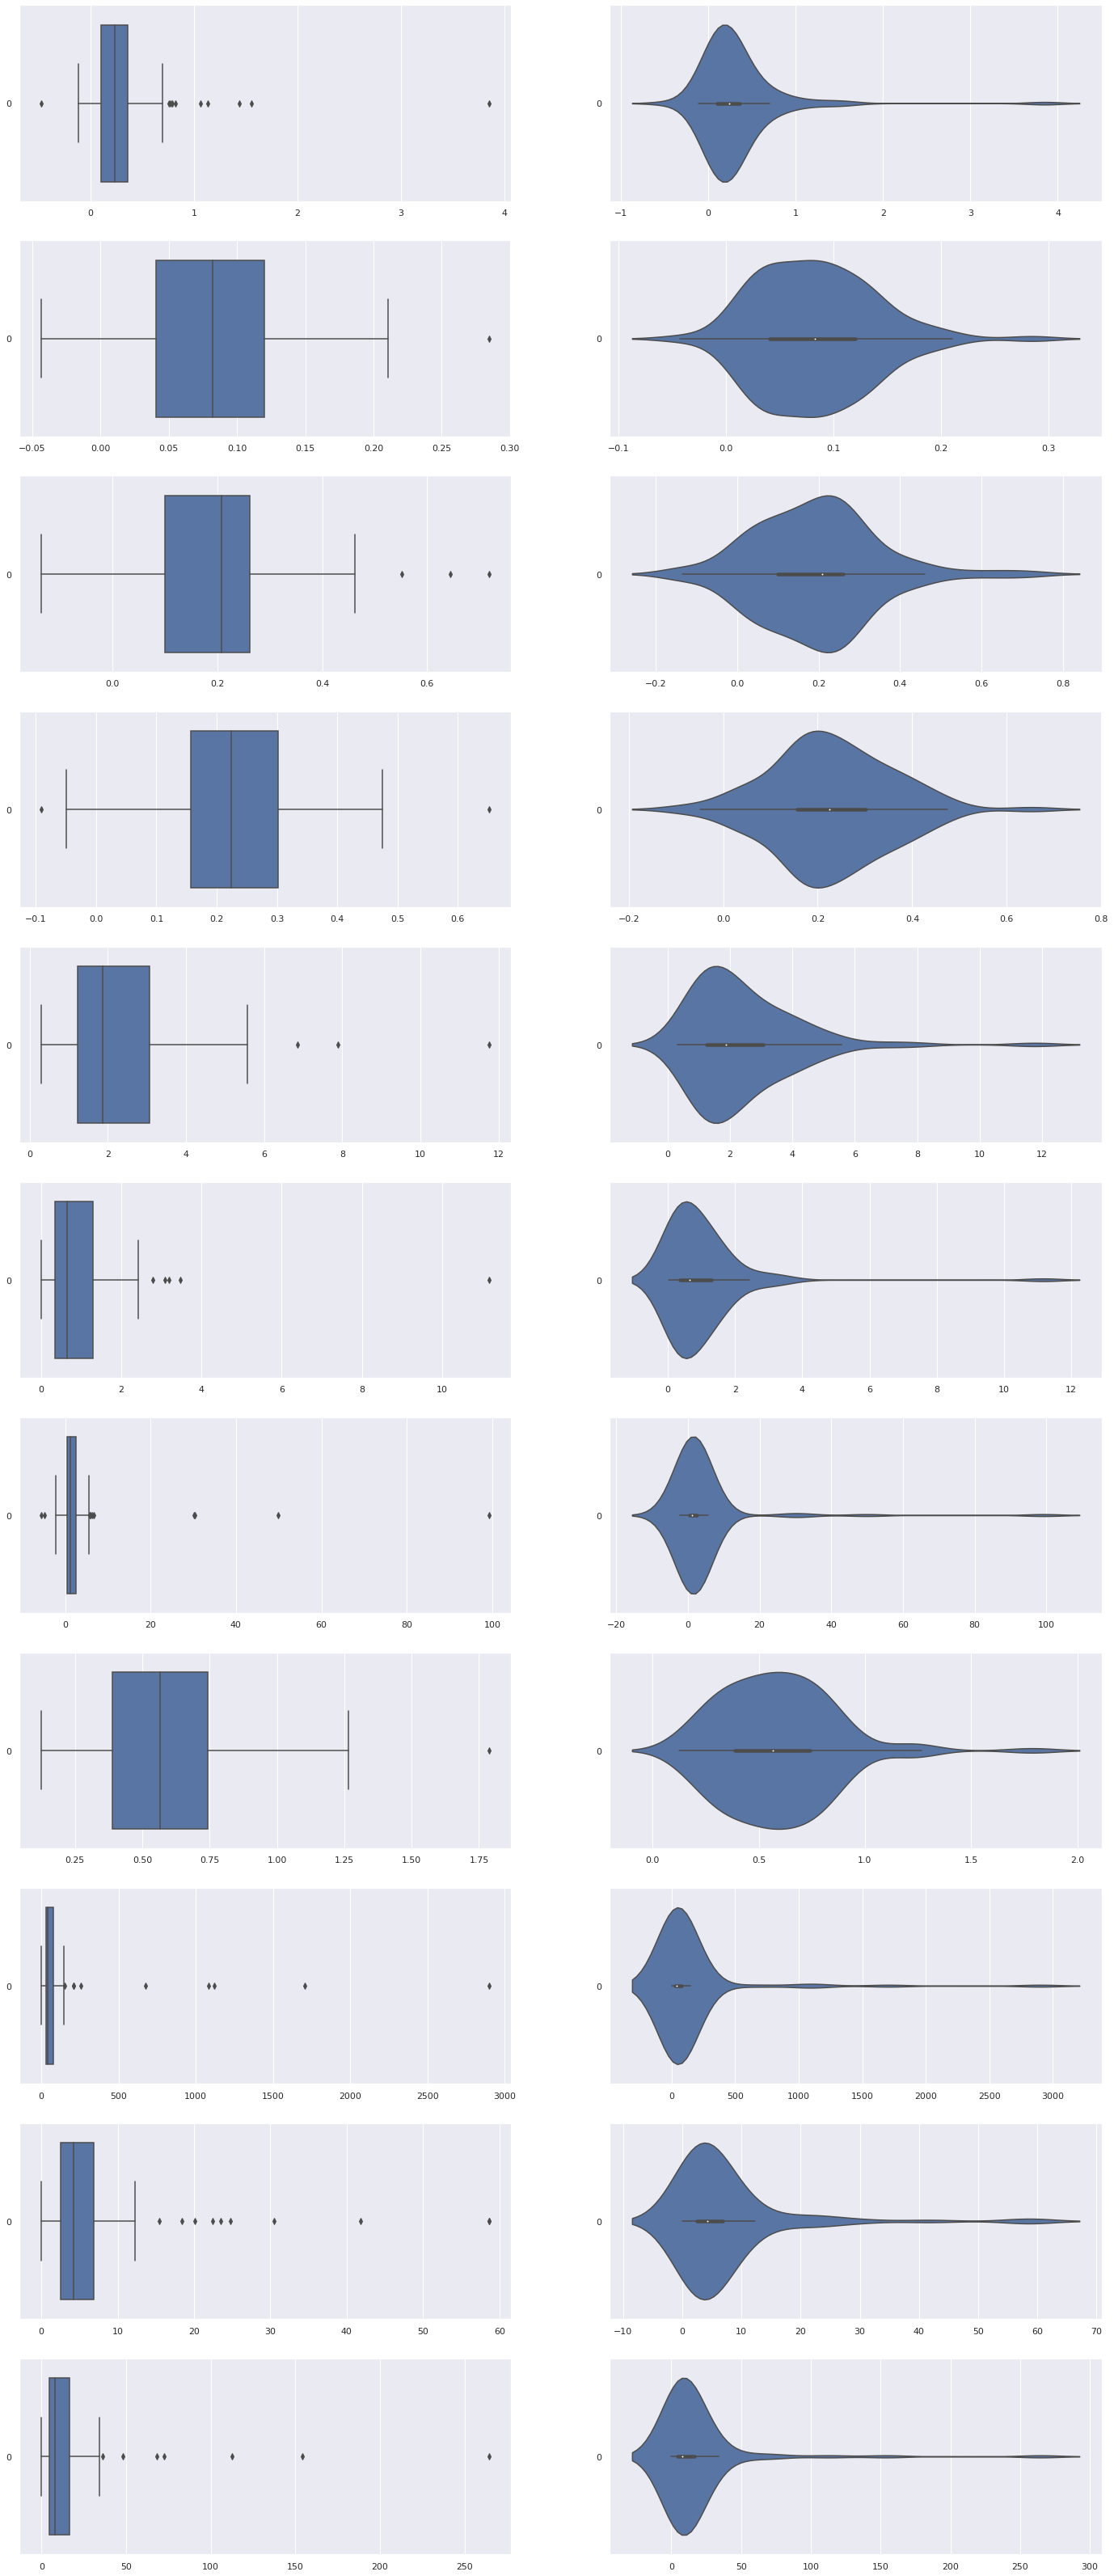

In [ ]:
clustering_plot = clustering_table
clustering_plot = clustering_plot.drop(columns=['Stocks'])

# Draw the distributions of all variables
f, axes = plt.subplots(11, 2, figsize=(24, 58))

count = 0
for var in clustering_plot:
    sb.boxplot(data = clustering_plot[var], orient = "h", ax = axes[count,0])
    sb.violinplot(data = clustering_plot[var], orient = "h", ax = axes[count,1])
    count += 1

### From the boxplots and violinplots obtained, we can observe that for some fundamental data, for instance, Return on Asset, there is a large spread of values, instead of them being all clumped together. This further suggests that we could possibly identify multiple clusters of companies for each of the indicator.


## Extracting fundamental data/ ratio based on each of the 4 key matrics


In [ ]:
profitability_table = clustering_table[['Return On Equity','Return On Assets','Profit Margin','Operating Margin']]
profitability_table

,Return On Equity,Return On Assets,Profit Margin,Operating Margin
0,0.8209,0.1336,0.2174,0.2525
1,0.4270,0.1281,0.3347,0.3924
2,0.2744,0.0524,0.0553,0.0593
3,0.2542,0.1395,0.3390,0.3801
4,0.1900,0.0865,0.2206,0.2258
...,...,...,...,...
84,0.2407,0.0974,0.4100,0.4379
85,0.0174,0.0148,0.0102,0.0372
86,1.5579,0.0709,0.1059,0.1640
87,0.1459,0.0817,0.1208,0.2230


In [ ]:
liquidity_table = clustering_table[['Current Ratio', 'Cash Ratio']]
liquidity_table

,Current Ratio,Cash Ratio
0,1.363604,0.360710
1,2.515765,0.187747
2,1.050227,0.333283
3,5.051065,1.173219
4,3.066756,0.465654
...,...,...
84,1.475968,0.165630
85,2.053563,0.691784
86,1.181969,0.735066
87,3.927597,2.437041


In [ ]:
solvency_table = clustering_table[['Debt to Equity Ratio', 'Debt to Asset Ratio']]
solvency_table

,Debt to Equity Ratio,Debt to Asset Ratio
0,3.957039,0.798267
1,1.546921,0.607369
2,2.796807,0.813316
3,0.241843,0.194745
4,0.436192,0.303714
...,...,...
84,0.684611,0.406391
85,1.686839,0.627815
86,30.082645,0.967828
87,1.321775,0.613425


In [ ]:
prospect_table = clustering_table[['PE Ratio','EPS','Price-To-Book Ratio']]
prospect_table

,PE Ratio,EPS,Price-To-Book Ratio
0,36.5989,3.687,34.1826
1,38.5776,6.707,15.1000
2,80.6122,41.830,18.3473
3,29.9544,10.090,6.7810
4,39.0657,58.613,6.9362
...,...,...,...
84,19.9966,5.960,4.6381
85,123.3032,0.554,2.1454
86,29.2952,2.639,36.1890
87,14.9110,2.527,2.0526


# ALGORITHM OPTIMIZATION AND MACHINE LEARNING 

# METRIC 1: PROFITABILITY (Timothy)

## Finding optimal number of clusters based on Elbow-method 

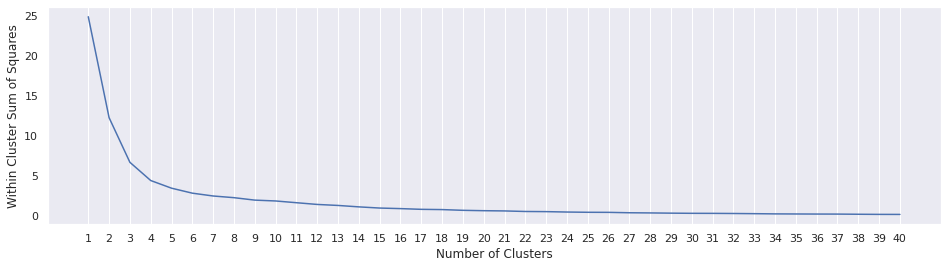

In [108]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(profitability_table)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

### Firstly, we adopt the elbow method to find the optimal number of clusters for our algorithm. In this case, the optimal number of clusters we have decided is 4. This is done by finding the Within Cluster Sum of Squares. Following which, we will use the k-means algorithm that will help us identify the centroids of each cluster and then partition the data that fits.


In [109]:
# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(profitability_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Displays the number of companies in each cluster

Features 	Return On Equity 	Return On Assets 	Profit Margin 	Operating Margin

Cluster 0:	0.06	0.04	0.08	0.16	
Cluster 1:	1.0	0.11	0.28	0.22	
Cluster 2:	3.85	0.14	0.15	0.21	
Cluster 3:	0.31	0.11	0.28	0.3	

Within Cluster Sum of Squares : 4.359807694804805



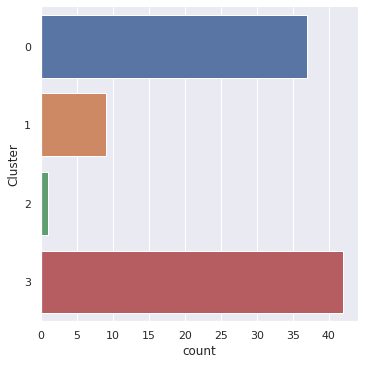

In [110]:
# Print the Cluster Centers
print("Features", "\tReturn On Equity", "\tReturn On Assets", "\tProfit Margin", "\tOperating Margin")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(profitability_table)

# Append Labels to the Data
X_labeled = profitability_table.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

## Pairplot for visualisation of each cluster's relative position 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



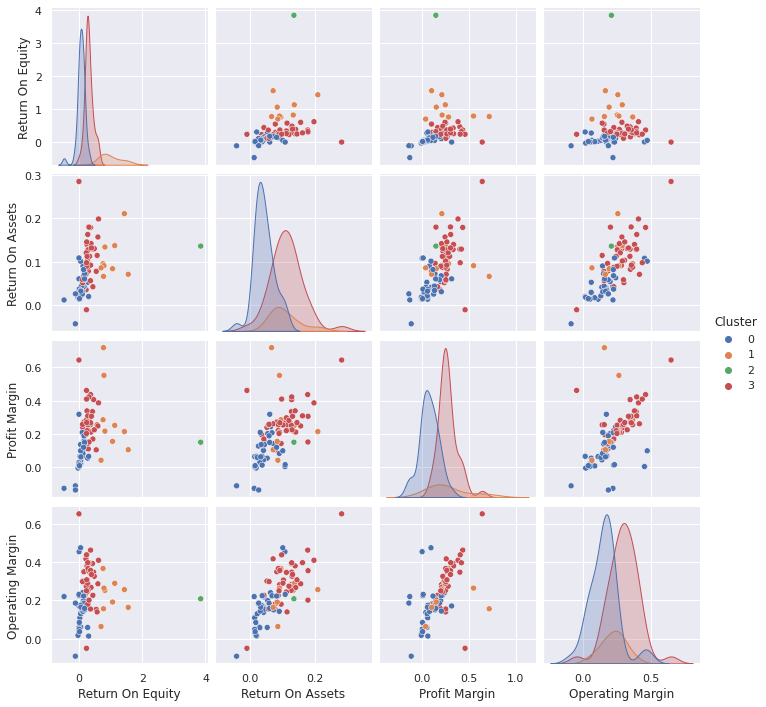

In [111]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = profitability_table.columns.values, hue = "Cluster")

## Histogram plot to show how each cluster scores based on the fundamental data 

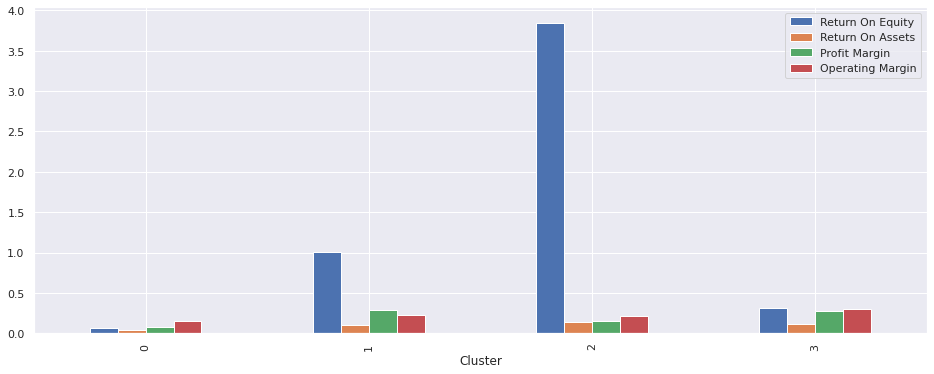

In [112]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Boxplot to depict cluster data through their quartiles

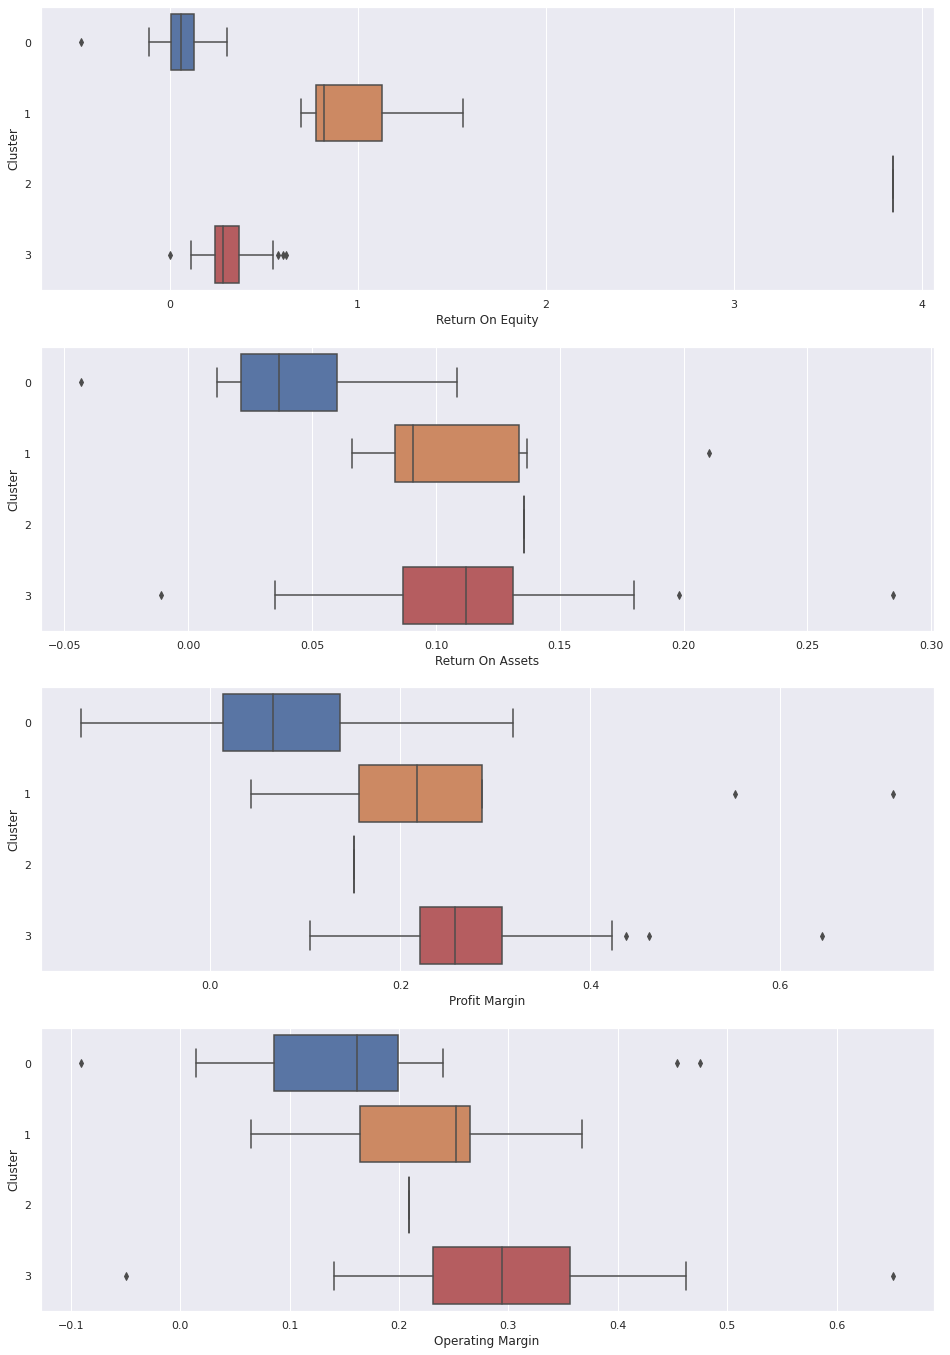

In [113]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(4, 1, figsize=(16,24))

sb.boxplot(x = 'Return On Equity', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Return On Assets', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Profit Margin', y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'Operating Margin', y = 'Cluster', data = X_labeled, ax = axes[3])

============================================================================================================

All other things being equal, a company with a higher ROE, ROA, Operating Margin and Profit Margin is preferred. 

From the above boxplots, we can observe that cluster 3 does better in ROA, Operating Margin and Profit Margin 

Moreover, the boxplot shows an outlier of cluster 2 that has exceptionally high ROE and decent values for the rest. We generally would weigh ROE higher than Operating Margin because ROE (Net Income / Shareholder's Equity) shows how well a company uses investment funds from shareholders to generate earnings so it is important to investors that a company has good ROE as well.

In our interest of finding profitable companies, we shall therefore include cluster 2 and 3 in our final analysis.

============================================================================================================

## Identify which companies belong to the best cluster for profitability 

In [119]:
# Mapping the index of each company to their respective cluster 
cluster_map = pd.DataFrame()
cluster_map['cluster'] = labels
cluster_map

,cluster
0,1
1,3
2,0
3,3
4,3
...,...
84,3
85,0
86,1
87,0


In [122]:
cluster3 = cluster_map[cluster_map.cluster == 3]
company_list = cluster3.drop(columns="cluster")

profit_cluster3 = []
for index, row in company_list.iterrows():
  profit_cluster3.append(clustering_table["Stocks"][index])
profit_cluster3

['MSFT',
 'FB',
 'GOOGL',
 'GOOG',
 'INTC',
 'NVDA',
 'ADBE',
 'PYPL',
 'CSCO',
 'NFLX',
 'PEP',
 'TXN',
 'INTU',
 'VRTX',
 'ADP',
 'REGN',
 'ATVI',
 'AMD',
 'AMAT',
 'CSX',
 'LRCX',
 'ADI',
 'ZM',
 'BIIB',
 'MNST',
 'DXCM',
 'KLAC',
 'SGEN',
 'ASML',
 'CTAS',
 'VRSK',
 'CDNS',
 'PAYX',
 'ANSS',
 'VRSN',
 'FAST',
 'BMRN',
 'XLNX',
 'SWKS',
 'CPRT',
 'MXIM',
 'CHKP']

In [124]:
cluster2 = cluster_map[cluster_map.cluster == 2]
company_list = cluster2.drop(columns="cluster")

profit_cluster2 = []
for index, row in company_list.iterrows():
  profit_cluster2.append(clustering_table["Stocks"][index])
profit_cluster2

['ORLY']

# METRIC 2: LIQUIDITY (Timothy)

## Finding optimal number of clusters based on Elbow-method 

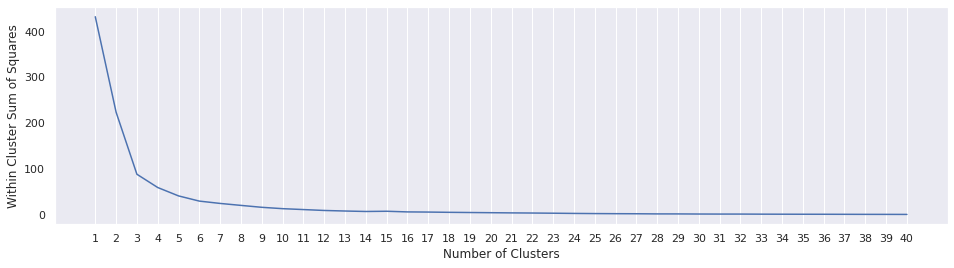

In [125]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(liquidity_table)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [126]:
# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(liquidity_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Displays the number of companies in each cluster

Features 	Current Ratio 	Cash Ratio

Cluster 0:	1.2	0.37	
Cluster 1:	4.7	2.0	
Cluster 2:	2.66	0.95	
Cluster 3:	11.75	11.16	

Within Cluster Sum of Squares : 59.441260408923554



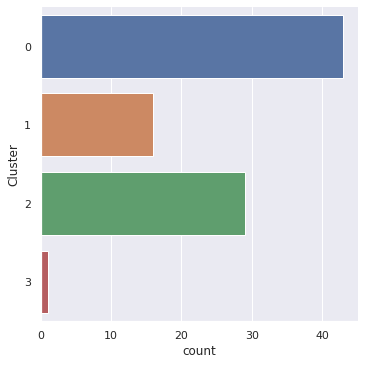

In [131]:
# Print the Cluster Centers
print("Features", "\tCurrent Ratio", "\tCash Ratio")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(liquidity_table)
labels

# Append Labels to the Data
X_labeled = liquidity_table.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

## Pairplot for visualisation of each cluster's relative position 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



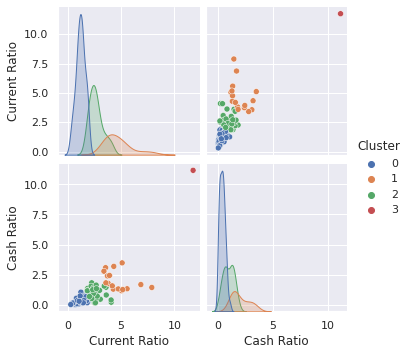

In [128]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = liquidity_table.columns.values, hue = "Cluster")

## Histogram plot to show how each cluster scores based on the fundamental data 

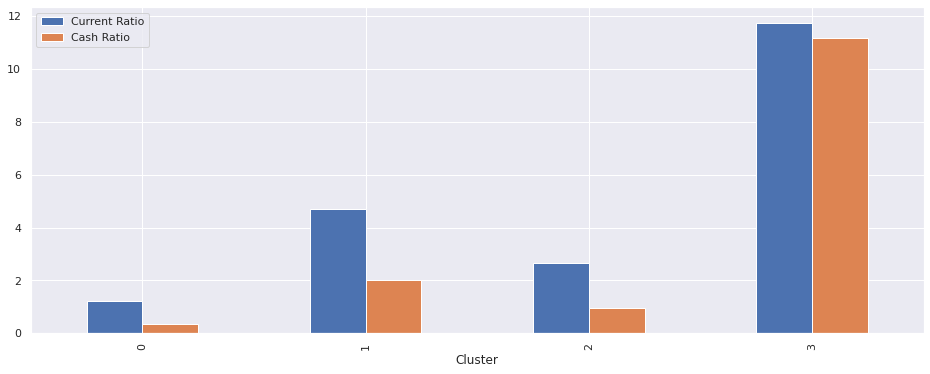

In [132]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Boxplot to depict cluster data through their quartiles

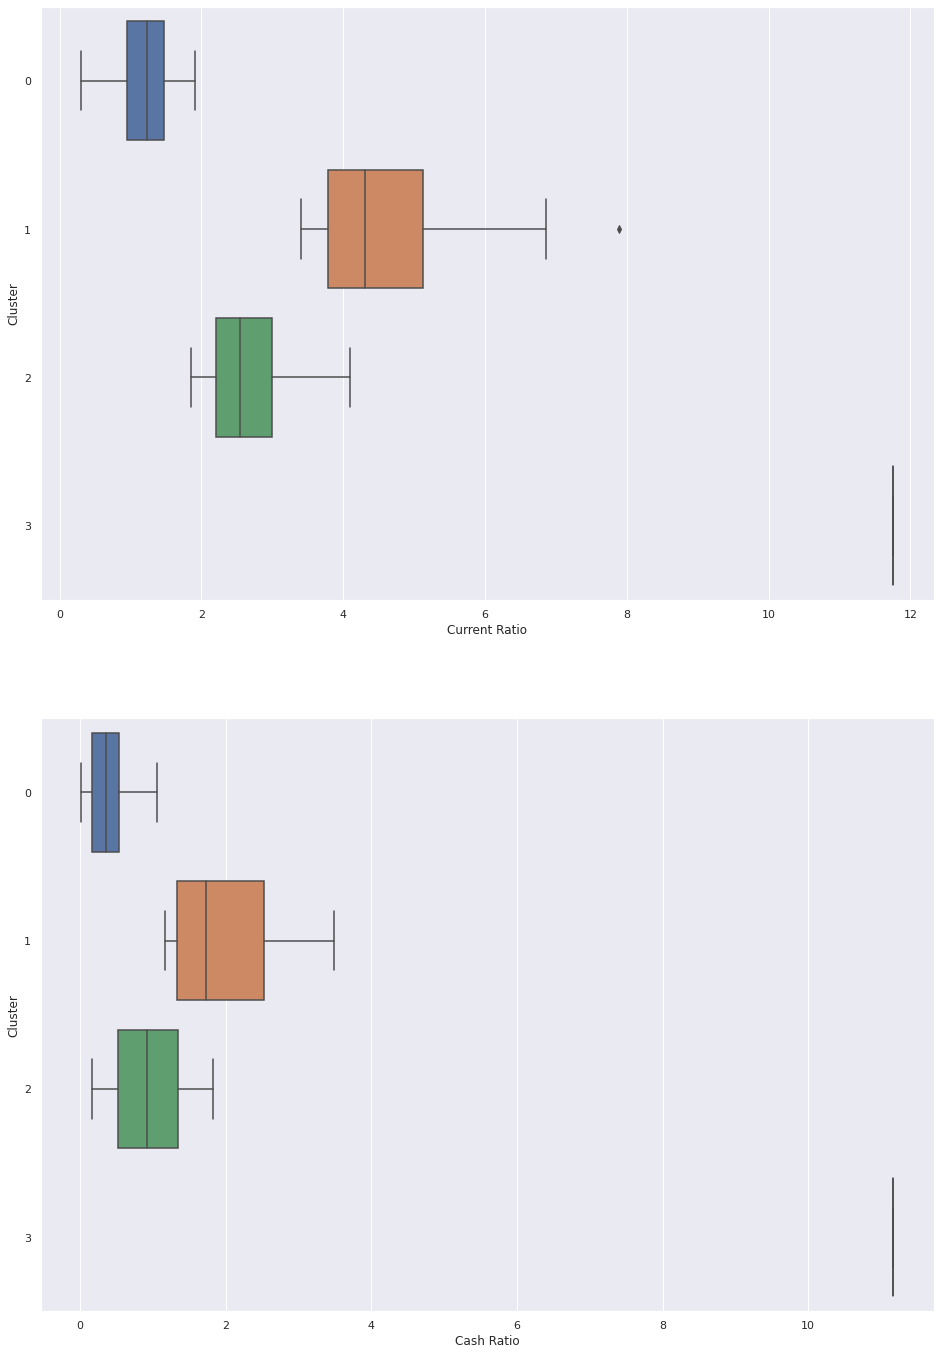

In [133]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(2, 1, figsize=(16,24))

sb.boxplot(x = 'Current Ratio', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'Cash Ratio', y = 'Cluster', data = X_labeled, ax = axes[1])

============================================================================================================

All other things being equal, a company with a higher Current Ratio and Cash Ratio is preferred. 

From the above boxplots, we can observe that cluster 1 does better in both aspects and there exists an outlier, cluster 3 that also does exceptionally well in both aspects. 

In our interest of finding companies that are more liquid, we shall include cluster 1 and cluster 3 in our final analysis.

============================================================================================================

## Identify which companies belong to the best cluster for liquidity

In [134]:
# Mapping the index of each company to their respective cluster 
cluster_map = pd.DataFrame()
cluster_map['cluster'] = labels
cluster_map

,cluster
0,0
1,2
2,0
3,1
4,2
...,...
84,0
85,2
86,0
87,1


In [135]:
cluster3 = cluster_map[cluster_map.cluster == 3]
company_list = cluster3.drop(columns="cluster")

liquidity_cluster3 = []
for index, row in company_list.iterrows():
  liquidity_cluster3.append(clustering_table["Stocks"][index])
liquidity_cluster3

['CSGP']

In [136]:
cluster1 = cluster_map[cluster_map.cluster == 1]
company_list = cluster1.drop(columns="cluster")

liquidity_cluster1 = []
for index, row in company_list.iterrows():
  liquidity_cluster1.append(clustering_table["Stocks"][index])
liquidity_cluster1

['FB',
 'TXN',
 'VRTX',
 'ISRG',
 'BKNG',
 'ATVI',
 'ZM',
 'MNST',
 'DXCM',
 'SGEN',
 'ALXN',
 'BMRN',
 'INCY',
 'SWKS',
 'MXIM',
 'FOXA']

# METRIC 3: SOLVENCY (Ivan)

## Finding optimal number of clusters based on Elbow-method 

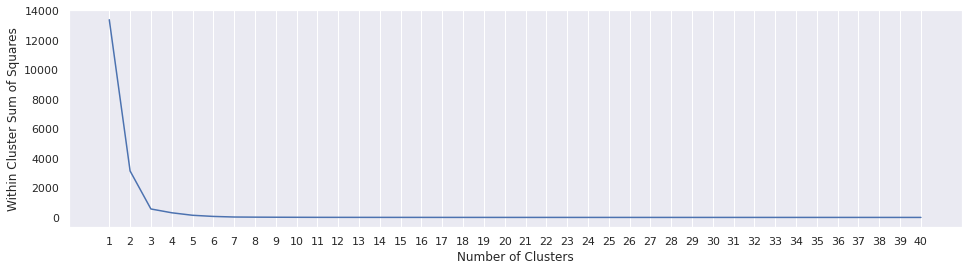

In [138]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(solvency_table)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [139]:
# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(solvency_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Displays the number of companies in each cluster

Features 	Debt to Equity Ratio 	Debt to Asset Ratio

Cluster 0:	1.52	0.57	
Cluster 1:	36.81	0.84	
Cluster 2:	99.2	1.2	

Within Cluster Sum of Squares : 571.8557245266544



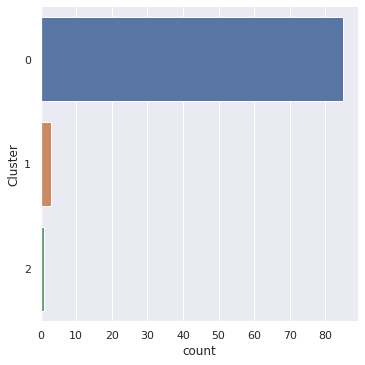

In [140]:
# Print the Cluster Centers
print("Features", "\tDebt to Equity Ratio", "\tDebt to Asset Ratio")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(solvency_table)

# Append Labels to the Data
X_labeled = solvency_table.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

## Pairplot for visualisation of each cluster's relative position 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



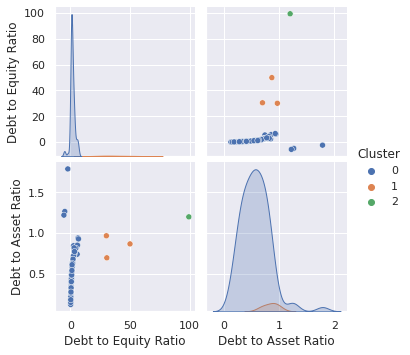

In [141]:
sb.pairplot(X_labeled, vars = solvency_table.columns.values, hue = "Cluster")

## Histogram plot to show how each cluster scores based on the fundamental data 

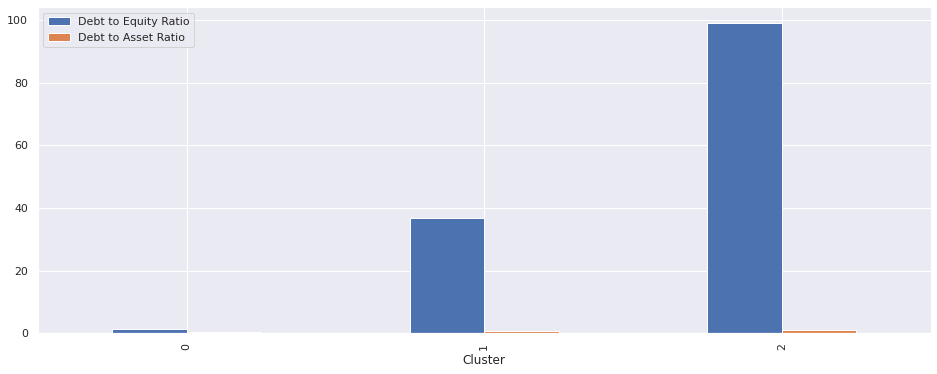

In [142]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Boxplot to depict cluster data through their quartiles

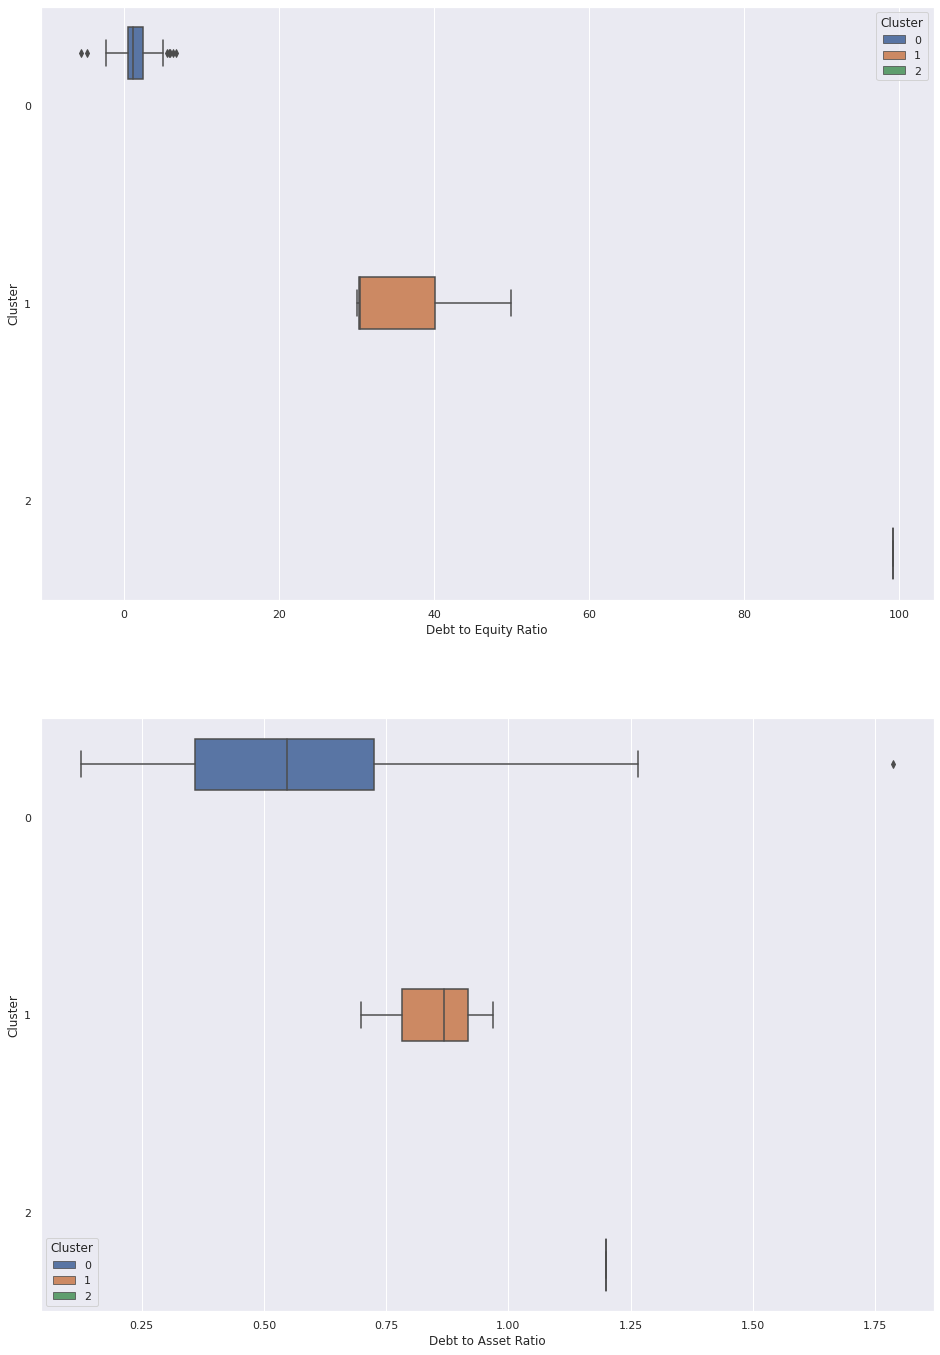

In [143]:
f, axes = plt.subplots(2,1, figsize = (16, 24))
sb.boxplot(x='Debt to Equity Ratio',y ='Cluster', hue = 'Cluster', data=X_labeled, ax=axes[0])
sb.boxplot(x='Debt to Asset Ratio', y='Cluster', hue = 'Cluster', data=X_labeled, ax=axes[1])

============================================================================================================

All other things being equal, a company with a lower Debt-To-Equity Ratio and a lower Debt-To-Asset Ratio is preferred.

From the above boxplots, we can clearly observe that cluster 0 does better in both aspects. Hence, we will include it in our Final Analysis. 


============================================================================================================

## Identify which companies belong to the best cluster for solvency

In [144]:
# Mapping the index of each company to their respective cluster 
cluster_map = pd.DataFrame()
cluster_map['cluster'] = labels
cluster_map

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
84,0
85,0
86,1
87,0


In [145]:
cluster0 = cluster_map[cluster_map.cluster == 0]
company_list = cluster0.drop(columns="cluster")

solvency_cluster0 = []
for index, row in company_list.iterrows():
  solvency_cluster0.append(clustering_table["Stocks"][index])
solvency_cluster0

['AAPL',
 'MSFT',
 'AMZN',
 'FB',
 'GOOGL',
 'GOOG',
 'INTC',
 'NVDA',
 'ADBE',
 'PYPL',
 'CSCO',
 'NFLX',
 'PEP',
 'TSLA',
 'CMCSA',
 'AMGN',
 'TMUS',
 'AVGO',
 'TXN',
 'CHTR',
 'QCOM',
 'GILD',
 'SBUX',
 'INTU',
 'VRTX',
 'MDLZ',
 'ISRG',
 'FISV',
 'BKNG',
 'ADP',
 'REGN',
 'ATVI',
 'AMD',
 'JD',
 'MU',
 'AMAT',
 'ILMN',
 'ADSK',
 'CSX',
 'MELI',
 'LRCX',
 'ADI',
 'ZM',
 'BIIB',
 'EA',
 'KHC',
 'WBA',
 'EBAY',
 'MNST',
 'DXCM',
 'EXC',
 'BIDU',
 'XEL',
 'NXPI',
 'CTSH',
 'KLAC',
 'SNPS',
 'SGEN',
 'ASML',
 'IDXX',
 'CSGP',
 'CTAS',
 'VRSK',
 'CDNS',
 'PAYX',
 'ALXN',
 'MCHP',
 'SIRI',
 'ANSS',
 'VRSN',
 'FAST',
 'BMRN',
 'XLNX',
 'INCY',
 'SWKS',
 'ALGN',
 'CERN',
 'CPRT',
 'TTWO',
 'MXIM',
 'CDW',
 'CHKP',
 'WDC',
 'FOXA',
 'LBTYK']

# METRIC 4: MARKET PROSPECT (Yi Xuan)

## Finding optimal number of clusters based on Elbow-method 

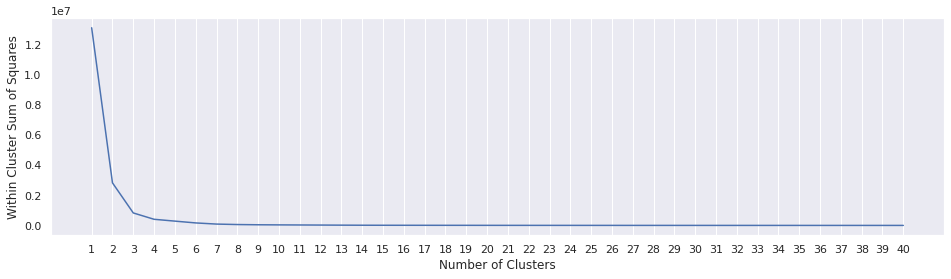

In [147]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(prospect_table)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f = plt.figure(figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [148]:
# Set "optimal" Clustering Parameters
num_clust = 3
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(prospect_table)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Displays the number of companies in each cluster

Features 	PE Ratio 	EPS 	Price-To-Book Ratio

Cluster 0:	52.88	7.71	17.17	
Cluster 1:	2897.33	0.19	48.07	
Cluster 2:	1144.32	0.59	15.81	

Within Cluster Sum of Squares : 827046.1627181108



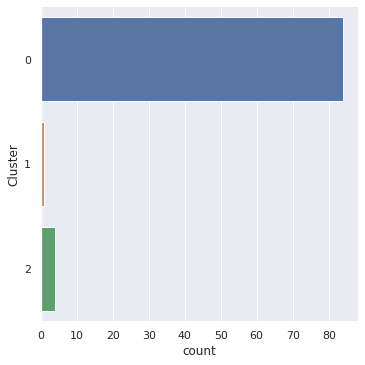

In [149]:
# Print the Cluster Centers
print("Features", "\tPE Ratio", "\tEPS", "\tPrice-To-Book Ratio")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(prospect_table)

# Append Labels to the Data
X_labeled = prospect_table.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(y = "Cluster", data = X_labeled, kind = "count")

## Pairplot for visualisation of each cluster's relative position 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



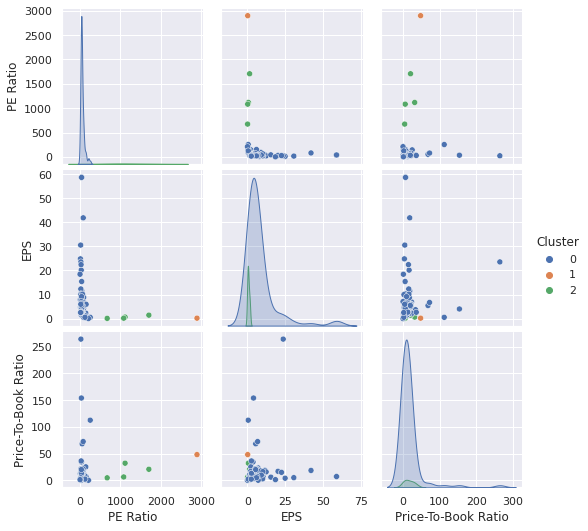

In [150]:
sb.pairplot(X_labeled, vars = prospect_table.columns.values, hue = "Cluster")

## Histogram plot to show how each cluster scores based on the fundamental data 

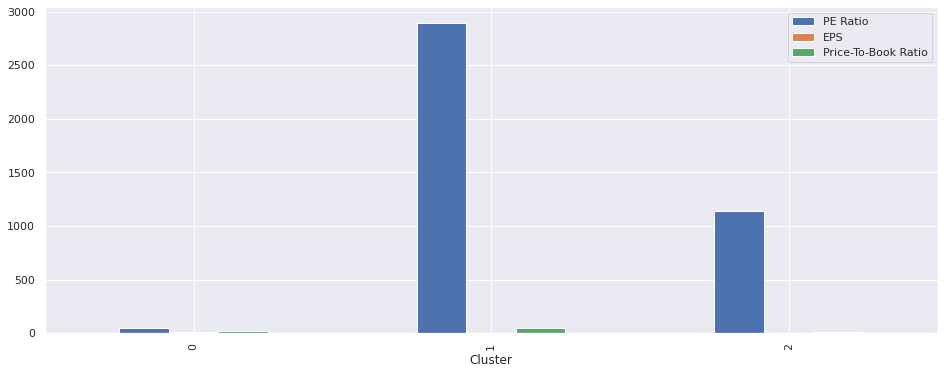

In [151]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

## Boxplot to depict cluster data through their quartiles

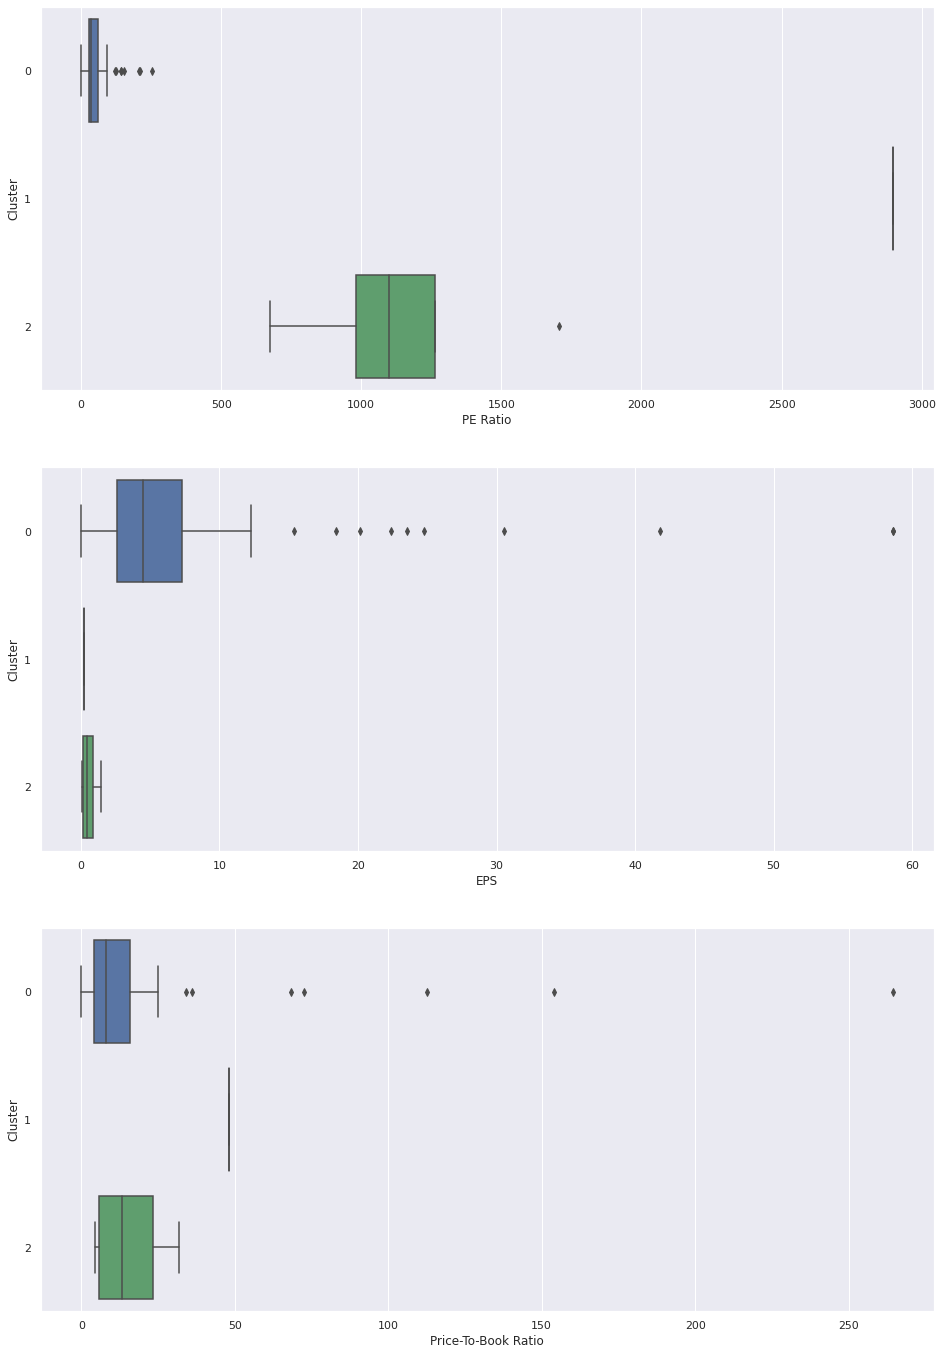

In [152]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(3, 1, figsize=(16,24))

sb.boxplot(x = 'PE Ratio', y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'EPS', y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'Price-To-Book Ratio', y = 'Cluster', data = X_labeled, ax = axes[2])


============================================================================================================

All other things being equal, a company with a low PE Ratio, a high EPS and Price-To-Book Ratio, is preferred. 

From the above boxplots, we can observe that cluster 0 exhibits lower PE Ratio and higher EPS but lower Price-To-Book Ratio. 

In our interest of finding the companies with the best market prospects, we have decided to choose cluster 0 as its shows more favourable results in 2 of the financial ratios as compared to just 1 other. 

============================================================================================================

## Identify which companies belong to the best cluster for market prospect

In [153]:
# Mapping the index of each company to their respective cluster 
cluster_map = pd.DataFrame()
cluster_map['cluster'] = labels
cluster_map

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
84,0
85,0
86,0
87,0


In [154]:
cluster0 = cluster_map[cluster_map.cluster == 0]
company_list = cluster0.drop(columns="cluster")

prospect_cluster0 = []
for index, row in company_list.iterrows():
  prospect_cluster0.append(clustering_table["Stocks"][index])
prospect_cluster0

['AAPL',
 'MSFT',
 'AMZN',
 'FB',
 'GOOGL',
 'GOOG',
 'INTC',
 'NVDA',
 'ADBE',
 'PYPL',
 'CSCO',
 'NFLX',
 'PEP',
 'CMCSA',
 'AMGN',
 'TMUS',
 'AVGO',
 'TXN',
 'CHTR',
 'QCOM',
 'SBUX',
 'INTU',
 'VRTX',
 'MDLZ',
 'ISRG',
 'FISV',
 'ADP',
 'REGN',
 'ATVI',
 'AMD',
 'JD',
 'MU',
 'AMAT',
 'ILMN',
 'ADSK',
 'CSX',
 'LRCX',
 'ADI',
 'ZM',
 'BIIB',
 'EA',
 'KHC',
 'WBA',
 'EBAY',
 'MNST',
 'DXCM',
 'EXC',
 'BIDU',
 'XEL',
 'ORLY',
 'CTSH',
 'KLAC',
 'SNPS',
 'SGEN',
 'ASML',
 'IDXX',
 'CSGP',
 'CTAS',
 'VRSK',
 'MAR',
 'CDNS',
 'PAYX',
 'ALXN',
 'MCHP',
 'SIRI',
 'ANSS',
 'VRSN',
 'FAST',
 'BMRN',
 'XLNX',
 'INCY',
 'SWKS',
 'ALGN',
 'CERN',
 'CPRT',
 'CTXS',
 'TTWO',
 'MXIM',
 'CDW',
 'CHKP',
 'WDC',
 'NTAP',
 'FOXA',
 'LBTYK']

# FINAL ANALYSIS (ALL)

## We will gauge the investment-worthiness of a company by its frequency of appearing in the best clusters for each metric


In [155]:
# Combining all the clusters into main list 
main_list = []
main_list = profit_cluster2 + profit_cluster3 + liquidity_cluster1 + liquidity_cluster3 +  solvency_cluster0 + prospect_cluster0

## Best companies are those companies that appear 4 times 

## Good companies are those companies that appear 3 times 

In [156]:
best_companies = []
good_companies = []

# Assigning the companies to the respective list above based on their frequency of appearance
counter = 0
for stocks in ticker_list: 
    for index in range(len(main_list)):
        if stocks == main_list[index]:
            counter += 1
            
    if counter == 4:
        best_companies.append(stocks)
    elif counter == 3:
        good_companies.append(stocks)
    counter = 0 

In [157]:
best_companies 

['FB',
 'TXN',
 'VRTX',
 'ATVI',
 'ZM',
 'MNST',
 'DXCM',
 'SGEN',
 'BMRN',
 'SWKS',
 'MXIM']

============================================================================================================

The companies present in this list are companies that are good in profitability, market prospects, liquidity and solvency. 

Diving further into the analysis of these companies, we can observe that they are generally companies from the technological, semiconductor and the pharmeceutical industry. 

============================================================================================================

In [158]:
good_companies

['MSFT',
 'GOOGL',
 'GOOG',
 'INTC',
 'NVDA',
 'ADBE',
 'PYPL',
 'CSCO',
 'NFLX',
 'PEP',
 'INTU',
 'ISRG',
 'ADP',
 'REGN',
 'AMD',
 'AMAT',
 'CSX',
 'LRCX',
 'ADI',
 'BIIB',
 'KLAC',
 'ASML',
 'CSGP',
 'CTAS',
 'VRSK',
 'CDNS',
 'PAYX',
 'ALXN',
 'ANSS',
 'VRSN',
 'FAST',
 'XLNX',
 'INCY',
 'CPRT',
 'CHKP',
 'FOXA']

============================================================================================================

The companies present in this list are companies that performs well in 3 of the 4 categories and are considered good companies to invest in.

Similar to the above analysis, we can observe that they are generally companies from the technological, semiconductor or the pharmeceutical industry. 

============================================================================================================

============================================================================================================
# CONCLUSION 

## Linking back to our problem statement, we have developed an algorithm to identify out of a given set of companies, the most investment-worthy of them. This is done through a cluster-based approach using 4 key financial metrics. This gives us and investors, a more informed decision backed by data analysis, thereby strengthening and diversifying our portfolio to maximise gains and capitalise on this well-rounded strategy created.
============================================================================================================
